## Import Necessary Libraries

In [1]:
#import libraries
import pandas as pd #import pandas libarary
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE #import sampling
import numpy as np
from sklearn.model_selection import train_test_split #data split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier  # importing XGBClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay # visualize metrics

## loading the dataset for the creation of the model

In [2]:
df_data =pd.read_csv('D:/dis_cmp/2023-027/Disease/dataset/env_data88.csv')#read csv
#display few records available in the dataset with the column names
df_data.head()

,date,time,temperature,humidity,ventilation,light_intensity,ph,disease growth possibility level
0,6/14/2018,8:30,22.40,82,low,high,6.9,High
1,6/14/2018,11:40,14.29,61,high,medium,8.6,Low
2,6/14/2018,14:30,13.47,86,low,medium,8.7,Moderate
3,6/14/2018,17:40,12.84,60,high,medium,8.1,Low
4,6/15/2018,8:30,27.84,83,low,high,6.8,High


In [3]:
# getting all the information regarding the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   date                              7124 non-null   object 
 1   time                              7124 non-null   object 
 2   temperature                       7124 non-null   float64
 3   humidity                          7124 non-null   int64  
 4   ventilation                       7118 non-null   object 
 5   light_intensity                   7118 non-null   object 
 6   ph                                7118 non-null   float64
 7   disease growth possibility level  7124 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 445.4+ KB


## Checking for null and duplicate values

In [4]:
# here the code  is checking weather any nulls values are in the datset
df_data.isnull().sum()

date                                0
time                                0
temperature                         0
humidity                            0
ventilation                         6
light_intensity                     6
ph                                  6
disease growth possibility level    0
dtype: int64

In [5]:
#drop null values
df_data.dropna(inplace=True)

## Drop unnecessary columns

In [6]:
df = df_data.drop(['date','time'], axis=1)#drop unnecessary columns

In [7]:
#print unique column values
print("Unique 'ventilation': {}".format(df['ventilation'].unique()))
print("Unique 'light_intensity': {}".format(df['light_intensity'].unique()))
print("Unique 'possibility for disease growth': {}".format(df['disease growth possibility level'].unique()))

Unique 'ventilation': ['low' 'high' 'medium']
Unique 'light_intensity': ['high' 'medium' 'low']
Unique 'possibility for disease growth': ['High' 'Low' 'Moderate']


## Convert categorical to numerical values

In [8]:
# Instantiate the LabelEncoder object
label_ventilation= LabelEncoder()
label_light_intensity = LabelEncoder()
label_prediction = LabelEncoder()

In [9]:
# Fit and transform the LabelEncoder object on the categorical data
df['ventilation'] = label_ventilation.fit_transform(df['ventilation'])
df['light_intensity'] = label_light_intensity.fit_transform(df['light_intensity'])
category_labels2 = {'High': 0, 'Moderate': 1, 'Low' : 2}
df['disease growth possibility level']= label_prediction.fit_transform([category_labels2.get(cat) for cat in df['disease growth possibility level']])
df

,temperature,humidity,ventilation,light_intensity,ph,disease growth possibility level
0,22.40,82,1,0,6.9,0
1,14.29,61,0,2,8.6,2
2,13.47,86,1,2,8.7,1
3,12.84,60,0,2,8.1,2
4,27.84,83,1,0,6.8,0
...,...,...,...,...,...,...
7119,9.14,80,0,1,8.4,1
7120,32.85,57,1,0,5.3,1
7121,10.57,53,0,1,8.2,2
7122,28.94,78,2,0,6.4,0


# Inter-feature Correlation
heatmap can be used to check correlation between variables

<Axes: >

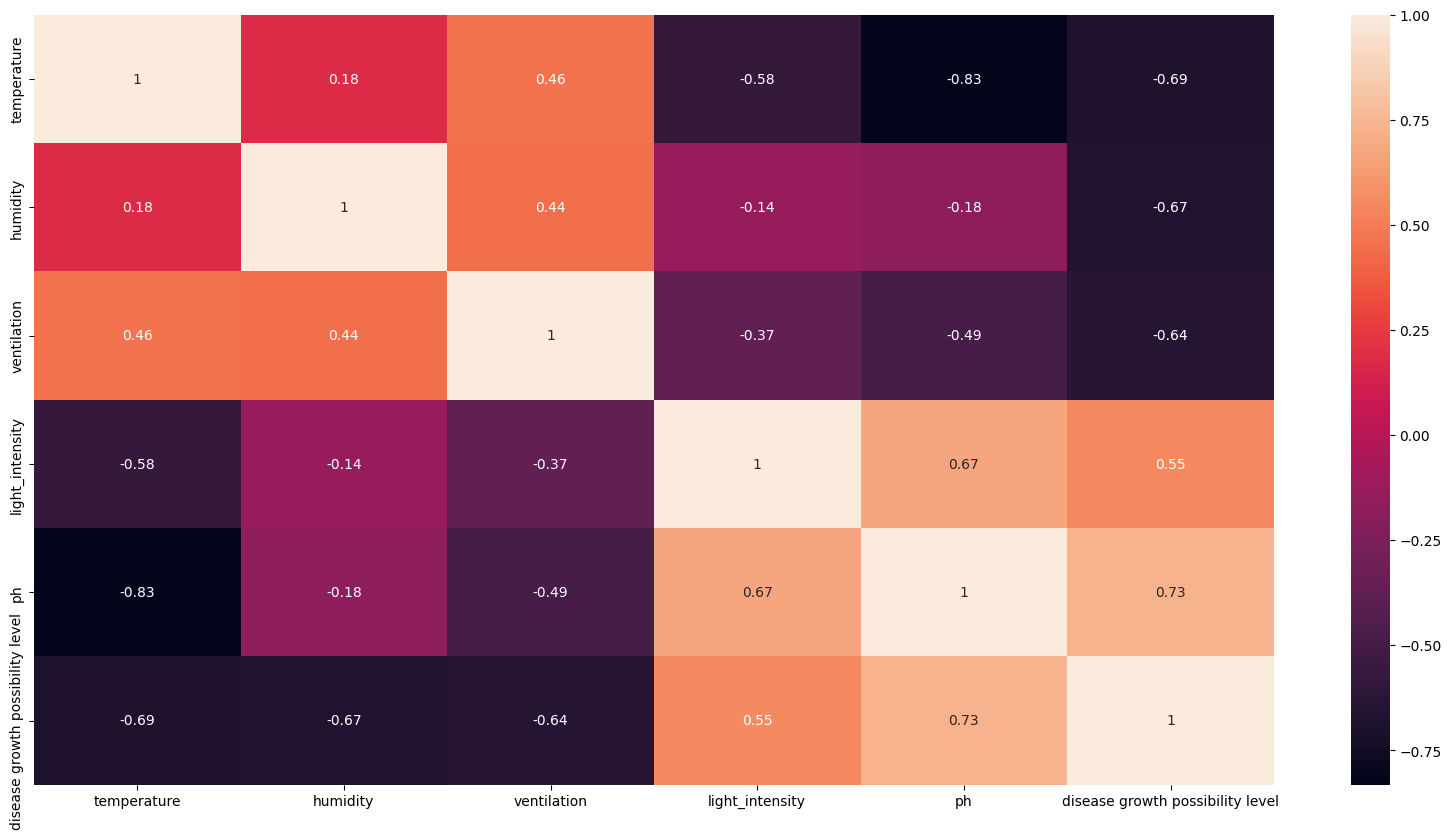

In [10]:
import seaborn as sns
hm=df
plt.figure(figsize = (20, 10))
sns.heatmap(hm.corr(), annot = True)

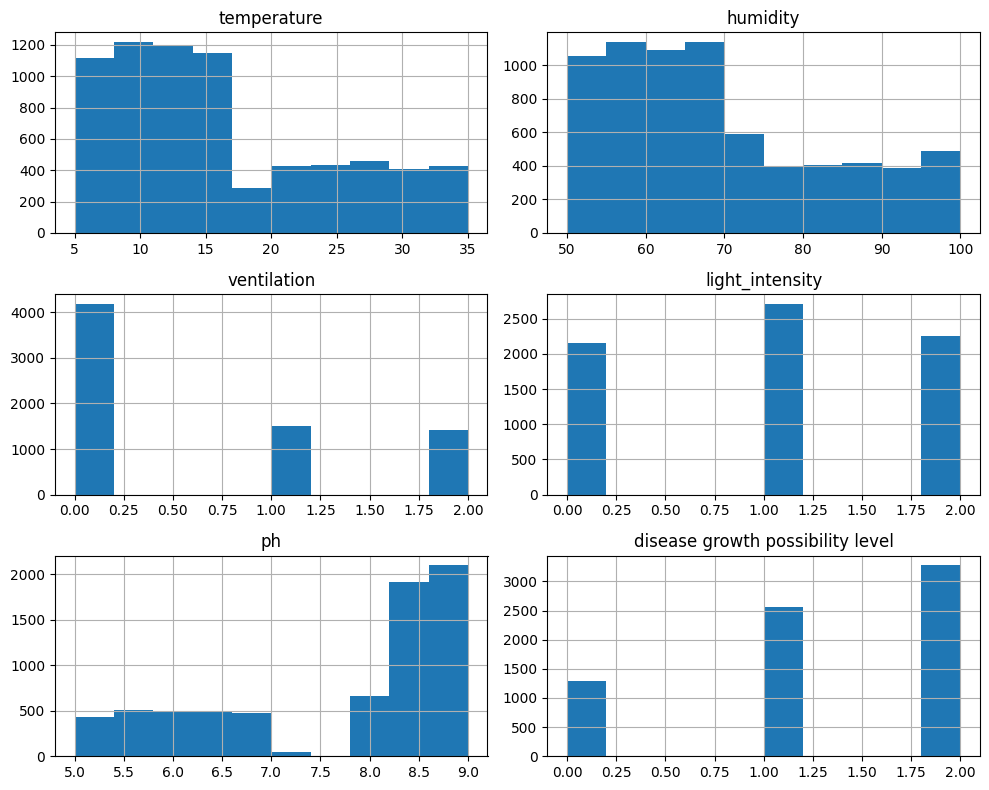

In [11]:
# Histogram of Features
fig = df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

# Class (Target) Distribution
Now, let's take a look at the distribution of class (target).If the class is highly imbalanced, we have to solve this issue so that our model will not be biased towards the majority class.

In [12]:
df['disease growth possibility level'].value_counts()#get class 1s and 0s

2    3278
1    2554
0    1286
Name: disease growth possibility level, dtype: int64

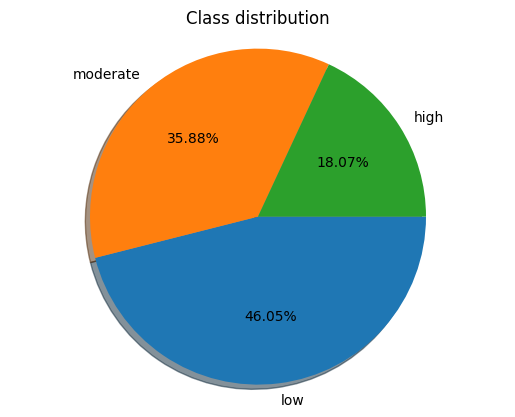

# samples associated with high level possibility for disease growth: 1286
# samples associated with moderate level possibility for disease growth: 2554
# samples associated with low level possibility for disease growth: 3278


In [13]:
class_occur = df['disease growth possibility level'].value_counts()
class_names = ['low','moderate', 'high']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with high level possibility for disease growth: {}".format(class_occur[0]))
print("# samples associated with moderate level possibility for disease growth: {}".format(class_occur[1]))
print("# samples associated with low level possibility for disease growth: {}".format(class_occur[2]))


In [14]:
# create the  object with the desired sampling strategy.
smote = SMOTE()

# fit the object to our training data
x, y = smote.fit_resample(df.loc[:,df.columns!='disease growth possibility level'], df['disease growth possibility level'])
print("Shape of X: {}".format(x.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (9834, 5)
Shape of y: (9834,)


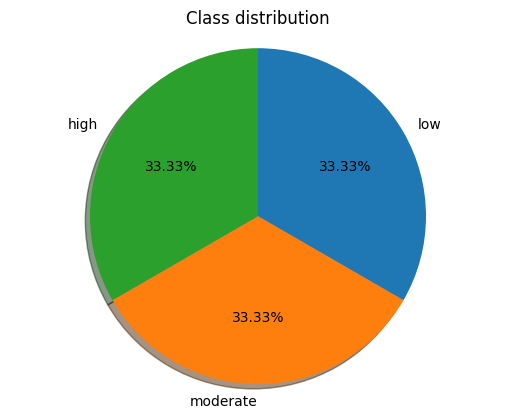

# samples associated with high level possibility for disease growth: 3278
# samples associated with moderate level possibility for disease growth: 3278
# samples associated with low level possibility for disease growth: 3278


In [15]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['low', 'moderate','high']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()
print("# samples associated with high level possibility for disease growth: {}".format(class_counts[0]))
print("# samples associated with moderate level possibility for disease growth: {}".format(class_counts[1]))
print("# samples associated with low level possibility for disease growth: {}".format(class_counts[2]))

## Data splitting

In [16]:
x_Train, x_Test, y_Train, y_Test = train_test_split( x, y, test_size = 0.3, random_state = 42)
print("Training data : ", x_Train.shape) #print the count that is used to train
print("Testing data : ", x_Test.shape) #print the count that is used to test

Training data :  (6883, 5)
Testing data :  (2951, 5)


## Data Normalization

In [17]:
# Feature Scaling is happens from the followng code
FeatureScaler = StandardScaler()
x_Train = FeatureScaler.fit_transform(x_Train)# declaring the traning set
x_Test = FeatureScaler.transform(x_Test)# declaring the testing set

## Building Model

In [18]:
model = XGBClassifier(objective="binary:logistic", random_state=42)#build model
results = model.fit(x_Train, y_Train)
train_predictions = model.predict(x_Train)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_Train, train_predictions)
y_prediction = results.predict(x_Test) 
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


## Evaluating the Model

In [19]:
print("XGBClassifier Classification : \n", classification_report(y_Test,y_prediction))# Classification report

XGBClassifier Classification : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       971
           1       1.00      1.00      1.00       991
           2       1.00      1.00      1.00       989

    accuracy                           1.00      2951
   macro avg       1.00      1.00      1.00      2951
weighted avg       1.00      1.00      1.00      2951



In [20]:
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_Test,y_prediction)))# Confusion matrix

Confusion matrix for XGB: 
[[970   1   0]
 [  0 991   0]
 [  0   0 989]]


In [21]:
print("Accuracy score for XGB: {:.5f}".format(accuracy_score(y_Test,y_prediction)))# test accuracy

Accuracy score for XGB: 0.99966


Text(0.5, 1.0, 'Actual vs Fitted Values for Yield')

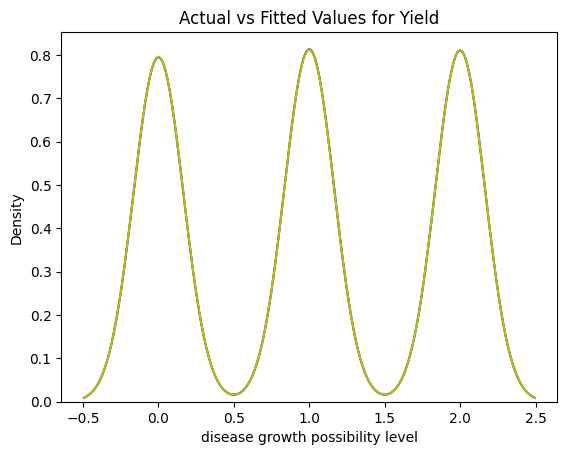

In [22]:
ax = sns.kdeplot(y_prediction, color="b", label="Actual Value")
sns.kdeplot(y_Test, color="y", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Yield')

Text(0.5, 1.0, 'Actual vs Fitted Values for Yield')

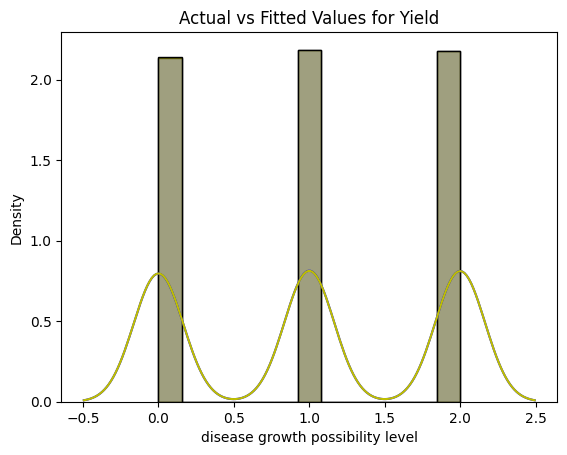

In [23]:
ax = sns.histplot(y_prediction,kde=True, stat="density",kde_kws=dict(cut=3),color="b", label="Actual Value")
sns.histplot(y_Test, kde=True, stat="density", kde_kws=dict(cut=3),color="y", label="Fitted Values", ax=ax)
plt.title('Actual vs Fitted Values for Yield')

## Saving the model

In [24]:
#Saving the model
#import joblib

#pred_classification = {
#    'model': model,
#}

#joblib.dump(pred_classification, 'xgbPred_classification.joblib')